In [1]:
import pandas as pd
import numpy as np

In [2]:
series =  pd.Series({'Col1':[0,1,2,3,4,5]})

# Pandas

Pandas is an extremely useful library for handeling and manipulating tabular data and arrays.
It is largely considered to be one of the most essential libraries in a Pythonic Data Scientist's tool kit but it has a myrid of uses from the perspective of an Engineer or IT person.

Below is a short but non-exhustive list of things you can do with pandas:
- Read in data from a variety of sources - Json, CSV, Excel, SQL tables, parquet, HDFS
- Manipulate and transform said data through filtering, aggregation, and pythonic methods
- Get metadata, basic statistics, and information on your data
- Build data pipelines
- Do some basic plotting/visualiztion (pandas has this feature built in with matplotlib)
- Push formated data to machine learning algorithms or statistical methods

Pandas introduces two data structures that you are likely familiar with if you have ever worked with SQL or Excel

In [6]:
# A series, a labled array / single column from a dataframe
series =  pd.Series({'Col1':[0,1,2,3,4,5]})

# A dataframe, tabular data structure with column labels and indexed rows
df = pd.DataFrame({'a':[1,2,3,4],'b':[5,6,7,8],'c':[9,10,11,12]})

# you can print these to see their structures, simply uncomment one of the below
#df

## Reading Data In

Before we can manipulate our data and learn about it we have to actually bring some into memory. Pandas has a multitude of .read_* methods that come with some useful and common presets. Many of these methods are highly customizable though and allow you to restrict, chunk, and customize the data that is being read-in.

For our following examples we'll be reading in some data and learning about it:

In [8]:
# reading in a CSV, protip - if its accessable you can pull directly from a URL - otherwise a path would be put in here

# Dataset covering demographic information on adults in the U.S.
df = pd.read_csv(r'https://raw.githubusercontent.com/Jaunson/Scripts/master/adult.csv')

In [10]:
# Learn about our data
df.info() #get data types, memory usage, null value counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education-num   32561 non-null  int64 
 6   marital-status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital-gain    32561 non-null  int64 
 12  capital-loss    32561 non-null  int64 
 13  hours-per-week  32561 non-null  int64 
 14  native-country  32561 non-null  object
 15  transport       32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [11]:
# get basic descriptive statitics on numerical columns
df.describe()

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,16280.000000,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,9399.695394,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8140.000000,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,16280.000000,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,24420.000000,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,32560.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# show the first 10 values, default = 5
df.head(10)
#df.tail() for the last rows

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,transport
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Manipulating Data

Pandas has many functions for grouping, aggregating, filtering, pivoting, and melting data. Just about anything you can do in sql you can do within Pandas. In fact for many functions pandas uses sql like syntax! Below we'll show a few examples of different transformations you can do, but you should know this is a non-exhustive list. You will have to investigate the library further to master it.

### Aggregating + Pivoting

In [14]:
# you can do groupby's and aggregations

# grouping by education - get the mean number hour per week, the min/max values for capital-gain
df_agg = df.groupby('education').agg({'hours-per-week':'mean','capital-gain':['min','max']}).reset_index()

#pivot the aggregation to turn each education level into a column
df_pivot = df.pivot_table(columns='education',values='hours-per-week', aggfunc='mean')

In [15]:
# Uncomment each of the below to see the results

# df_agg
# df_pivot

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
hours-per-week,37.052519,33.925957,35.7806,38.255952,38.897898,39.366873,38.044747,40.504217,41.610709,42.614006,46.973366,40.575374,43.836332,36.647059,47.425347,38.852284


### Filtering, Subsetting, and Isolating Columns

In [16]:
# you can drop rows/columns if unneeded
df = df.drop('fnlwgt', axis=1) # many functions accept axis as a argument, 0 = rows, 1 = columns

In [18]:
#Square Braket Notation
#You can call one more multple columns as a subset of a dataframe

edu = df['education']# creates a series which can be turned into an array to be passed to Scikit algorithms

#calling multiple columns
multiple = df[['education','age','workclass']]
#multiple

In [22]:
# We can subset rows with loc and iloc - this is an important one to know
df.iloc[0:5]

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,transport
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
# We can filter with square bracket notation
df_filter = df[df['education-num']>=10]
df_filter.head()

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,transport
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


In [25]:
#We can also use the .query method to filter our dataframes
df.query('age > 30')

# You can even chain .query methods
df.query('education==" Masters"').query('age > 35')

# You can also use 'and/or, contains, and in' statements within a .query()
df.query('education in [" Masters", " Bachelors"] and sex ==" Female" and age >= 40').head()

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,transport
19,19,43,Self-emp-not-inc,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
47,47,44,Private,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
102,102,47,Self-emp-not-inc,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
125,125,47,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
162,162,44,Self-emp-inc,Masters,14,Divorced,Exec-managerial,Unmarried,Asian-Pac-Islander,Female,0,0,40,United-States,<=50K


In [6]:
# We can self assign a fix to a column - here I strip out the spaces at the front of education strings
df['education'] = df.education.str.strip()

df.query('education=="Masters"').head()

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,transport
5,5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
19,19,43,Self-emp-not-inc,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
47,47,44,Private,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
87,87,33,Private,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K


## Joining, Unioning Data Frames

You can join and union dataframes in the much the same way that you might in SQL. One import libary to know in this context is glob. The library glob allows you to quickly union multiple flat files together - a common task when working with large distributed logs,. Below are some examples of a union and join in pandas

In [27]:
# a join example

df.columns = ['index', 'age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'transport']

#making two seperate dataframes, which we will join on the key - index
join1 = df[['index','age','workclass','education']][0:500]
join2 = df[['index','occupation','race','sex']][0:500]

join1.merge(join2, how='inner', on='index').head()

,index,age,workclass,education,occupation,race,sex
0,0,39,State-gov,Bachelors,Adm-clerical,White,Male
1,1,50,Self-emp-not-inc,Bachelors,Exec-managerial,White,Male
2,2,38,Private,HS-grad,Handlers-cleaners,White,Male
3,3,53,Private,11th,Handlers-cleaners,Black,Male
4,4,28,Private,Bachelors,Prof-specialty,Black,Female


In [29]:
# example of unions
union1 = df[['index','age','workclass','education']][0:500]
union2 = df[['index','age','workclass','education']][500:1000]
union3 = df[['index','age','workclass','education']][1000:1500]
union4 = df[['index','age','workclass','education']][1500:2000]

# union two tables
df_union = pd.concat([union1,union2],axis=0)

In [31]:
#union multiple files
union_list = [union2,union3,union4]

for item in union_list:
    union1 = pd.concat([union1,item])

union1

,index,age,workclass,education
0,0,39,State-gov,Bachelors
1,1,50,Self-emp-not-inc,Bachelors
2,2,38,Private,HS-grad
3,3,53,Private,11th
4,4,28,Private,Bachelors
...,...,...,...,...
1995,1995,44,Private,Some-college
1996,1996,49,Private,HS-grad
1997,1997,75,Self-emp-not-inc,Masters
1998,1998,37,Private,Bachelors


## Plotting with Pandas
While you have some awesome libaries such as matplotlib and Seaborn which can be highly customized to make beautiful visualizations, these often require some set up and know how to use effectively. Matplotlib in particular is often considered quite dense for beginners to get started with. Luckily has some useful and opinionated mathods that are built upon matplotlib - these allow you to do some quick basic visualiztions

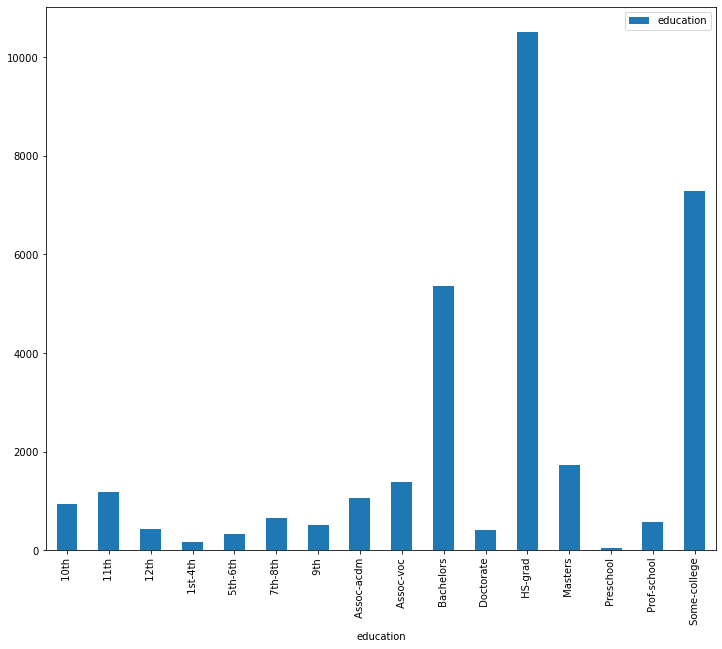

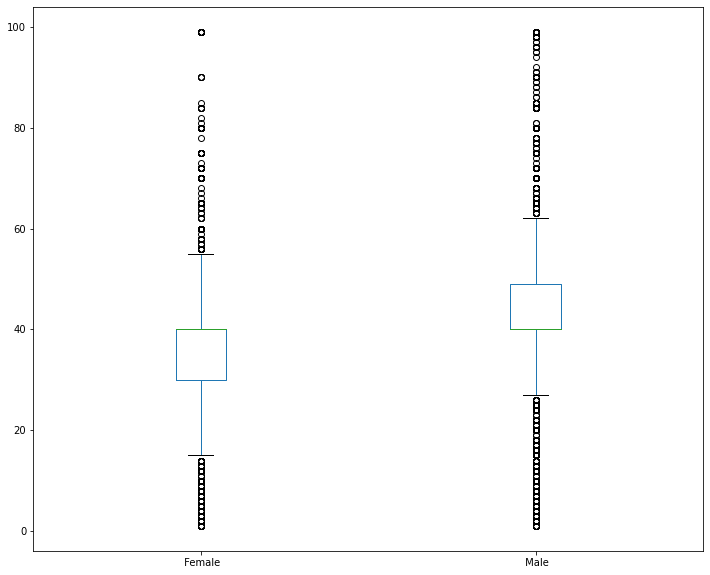

In [33]:
# count of indivduals by education level - bar plot
bar_plot = df.groupby('education').agg({'education':'count'})

#generate barplot, customizing figuresize
bar_plot.plot(figsize=(12,10),kind='bar')


#generate a pivot of hours per week across gender
box_plot = df[['sex','hours-per-week']].pivot(columns='sex',values='hours-per-week')

#build box plot
box_plot.plot(figsize=(12,10),kind='box')

In [36]:
df.to_csv(r'C:\Users\JJAMISON\df.csv')